In [1]:
# Load fibromyalgia data

import pickle

with open('../../LatentSimilarity/data/fibromyalgia-data.pkl', 'rb') as f:
    data = pickle.load(f)

print(list(data.keys()))

['subs', 'fibromyalgia', 'fibromyalgia_score', 'rest', 'epr']


In [2]:
# Create matrix of vectorized FC data and list demographic data numpy arrays

import numpy as np

subs = list(data['subs'])
subs.sort()

# Fibromyalgia, Fibromyalgia_Score, RestOrEpr
demo_types = ['categorical', 'continuous', 'categorical']
demo_types = ['continuous', 'categorical']

demo = [[], []]
fc = []

for sub in subs:
    notin = False
    for key in data.keys():
        if sub not in data[key]:
            notin = True
    if notin:
        print(sub)
        continue
    # demo[0].append(int(data['fibromyalgia'][sub]))
    # demo[0].append(demo[0][-1])
    demo[0].append(int(data['fibromyalgia_score'][sub]))
    demo[0].append(demo[0][-1])
    demo[1].append(0)
    demo[1].append(1)
    fc.append(data['rest'][sub])
    fc.append(data['epr'][sub])

fc = np.stack(fc)
for i in range(len(demo)):
    demo[i] = np.array(demo[i])
    print(demo[i])

print(fc.shape)

5
[494 494 709 709 786 786   0   0 775 775 645 645 562 562 276 276   0   0
 496 496   0   0 503 503   0   0 720 720   0   0 489 489 690 690   0   0
   0   0 341 341 564 564 589 589   0   0 586 586 533 533   0   0   0   0
   0   0   0   0   0   0   0   0 625 625 659 659  81  81 467 467   0   0
 541 541 566 566   0   0 335 335   0   0 674 674 276 276 572 572 441 441
 206 206 449 449   0   0   0   0   0   0   0   0   0   0 647 647 621 621
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
(130, 34716)


In [3]:
# Load pip DemoVAE model

import sys

p = '../pip/src'

if p not in sys.path:
    sys.path.append(p)
    print(sys.path)

from demovae import DemoVAE

vae = DemoVAE(pperiod=10, use_cuda=False, nepochs=3000, latent_dim=50, weight_decay=0, lr=5e-5, loss_rec_mult=200, loss_pred_mult=0.01)
vae.fit(fc, demo, demo_types)

['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/lib/python3.12/site-packages', '../pip/src']
Fitting auxilliary guidance model for demographic 0 continuous... done
Fitting auxilliary guidance model for demographic 1 categorical... done
Converting input to pytorch
Converting demographics to pytorch
Beginning VAE training
Epoch 0 ReconLoss 534.3566 CovarianceLoss 18.3073 MeanLoss 0.0563 DecorLoss 189.7454 GuidanceLosses [53.9713134765625, 0, 1] ['40795.3086', '3820.1924', '3820.1924'] 
Epoch 10 ReconLoss 214.5016 CovarianceLoss 45.0215 MeanLoss 0.5497 DecorLoss 128.5088 GuidanceLosses [425.84307861328125, 1, 0] ['1590.5825', '18.9923', '18.9923'] 
Epoch 20 ReconLoss 80.174 CovarianceLoss 111.6533 MeanLoss 0.8825 DecorLoss 74.7084 GuidanceLosses [475.0206298828125, 0, 1] ['1325.0916', '473.5703', '473.5703'] 
Epoch 30 ReconLoss 28.8145 CovarianceLoss 125.0266 MeanLoss 0.9348 DecorLoss 60.4543 GuidanceLosses [83.35015869140625, 1, 0] ['1983.42

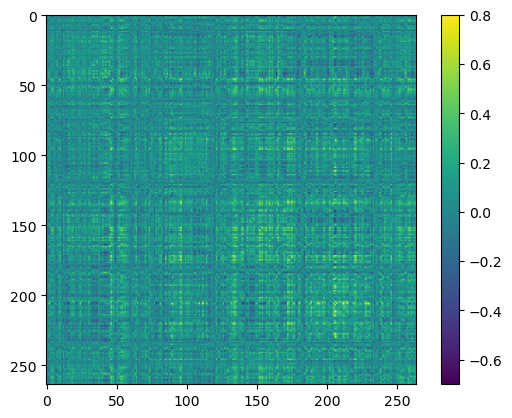

In [10]:
import matplotlib.pyplot as plt

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

xx = vae.transform(130, demo, demo_types)

plt.imshow(vec2mat(xx[0]))
plt.colorbar()

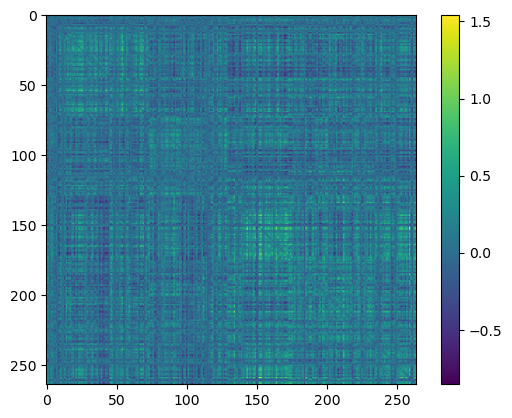

In [15]:
plt.imshow(vec2mat(xx[5]))
plt.colorbar()